In [1]:
import os
import io
from PIL import Image
from IPython.display import Image

In [2]:
# get your API key
OPENAI_API_KEY= os.environ["OPENAI_API_KEY"]

### Simply type in the following to begin
- /load sample_data/ds_salaries.csv sample_data/ds_salaries_schema.txt

In [3]:
%run -i "build_state_graph.py"

Welcome to TableAgentGPT! This tool enables you to interact with your tabular data by generating queries on your behalf.

To get started, please load your data and its metadata using the command:
/load <file_path> <table_columns_description>

Once your data is loaded, feel free to ask any questions, and I’ll retrieve insights for you.
To exit the system, simply type /q.


>>> User prompt (/q to quit, /load to load data):  which job title has the highest average salary in US dollar in 2020?


Routing to handle_user_input step...
Please load your data first using the command /load <file_path>  <table_columns_description>.


>>> User prompt (/q to quit, /load to load data):  /load sample_data/ds_salaries.csv sample_data/ds_salaries_schema.txt


Routing to load_data step...
Data file loaded into DuckDB.
Agent 'load_data' run time: 0.02 seconds.
Table 'ds_salaries' loaded with metadata:
Table: ds_salaries
- work_year: int. The year the salary was paid.
- experience_level: string. The experience level in the job during the year. Categories: EN that stands for Entry-level / Junior. MI that stands for Mid-level / Intermediate. SE that stands for Senior-level / Expert. EX that stands for Executive-level / Director.
- employment_type: string. The type of employment for the role. Categories: FT that stands for Full-time. PT that stands for Part-time. CT that stands for Contract. FL that stands for Freelance.
- job_title: string. The role's title. Examples: Data Scientist, Lead Data Analyst.
- salary:float. The total gross salary amount paid in the corresponding salary_currency.
- salary_currency: string.The currency of the salary paid. Examples: USD, EUR.
- salary_in_usd: float. The salary measured in USD dollars (standardized).
- em

>>> User prompt (/q to quit, /load to load data):  which job title has the highest average salary in US dollar in 2020?


Routing to build_query step...
SELECT job_title, AVG(salary_in_usd) AS average_salary
FROM ds_salaries
WHERE work_year = 2020
GROUP BY job_title
ORDER BY average_salary DESC
LIMIT 1;
Agent 'build_query' run time: 1.99 seconds.
Routing to execute_query step...
Agent 'execute_query' run time: 0.01 seconds.
Routing to post_execution step...
Agent 'post_execution' run time: 1.19 seconds.
The job title with the highest average salary in US dollars in 2020 is "Director of Data Science," with an average salary of $325,000.00.


>>> User prompt (/q to quit, /load to load data):  How much does an entry-level data scientist make on average in US dollar in 2020?  


Routing to build_query step...
SELECT AVG(salary_in_usd) AS average_salary
FROM ds_salaries
WHERE work_year = 2020 AND experience_level = 'EN' AND job_title = 'Data Scientist';
Agent 'build_query' run time: 1.90 seconds.
Routing to execute_query step...
Agent 'execute_query' run time: 0.00 seconds.
Routing to post_execution step...
Agent 'post_execution' run time: 0.92 seconds.
The average salary of an entry-level data scientist in 2020 was approximately $54,983.33 USD.


>>> User prompt (/q to quit, /load to load data):  how about the mid-level data scientist?


Routing to build_query step...
SELECT AVG(salary_in_usd) AS average_salary
FROM ds_salaries
WHERE work_year = 2020 AND experience_level = 'MI' AND job_title = 'Data Scientist';
Agent 'build_query' run time: 1.44 seconds.
Routing to execute_query step...
Agent 'execute_query' run time: 0.00 seconds.
Routing to post_execution step...
Agent 'post_execution' run time: 0.91 seconds.
The average salary for a mid-level Data Scientist in the year 2020 was $71,256.00 USD.


>>> User prompt (/q to quit, /load to load data):  how much does a prompt engineer make a year?


Routing to build_query step...
Agent 'build_query' run time: 1.11 seconds.
Routing to handle_user_input step...
Your question is ambiguous. Please provide additional details: Are you looking for the average salary of a prompt engineer across all years, or do you want the salary for a specific year?


>>> User prompt (/q to quit, /load to load data):  accross all years


Routing to build_query step...
SELECT AVG(salary_in_usd) AS average_salary
FROM ds_salaries
WHERE job_title = 'Prompt Engineer';
Agent 'build_query' run time: 1.60 seconds.
Routing to execute_query step...
Agent 'execute_query' run time: 0.00 seconds.
Routing to post_execution step...
Agent 'post_execution' run time: 3.37 seconds.
The query did not return any results for the job title "Prompt Engineer." This may suggest that there are no entries in the "ds_salaries" table for this title across all years.


>>> User prompt (/q to quit, /load to load data):  /q


Routing to END step...


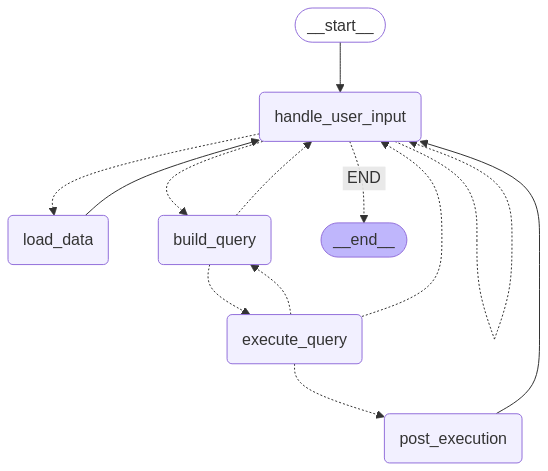

In [7]:
# draw the graph
Image(graph.get_graph().draw_mermaid_png())